# Quantitative Analysis of the Relationship Between Length of the Text and Amount of Features It Contains in an Instance of _The Moonstone_

## Ziyang


In [1]:
# Import all your libraries here, and only here, please.
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.corpus import PlaintextCorpusReader
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk import ngrams,pos_tag,sent_tokenize,word_tokenize

import predictPrecise

# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

C:\Users\JackC\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
C:\Users\JackC\AppData\Local\Continuum\anaconda3\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


Abstract: It’s challenging to find where a short sentence comes from. To a longer paragraph, however, it is relatively more facile. Does something like a minimum length exist over which the sentences include much text features makes it possible to find where it comes from? In this paper, we analyze the above question.

Keywords: NLP, Text Feature Extraction

PS: We in this article means my laptop and me.

## Hypotheses
<br></br>
### 1. There's a positive relationship between the length of the text and amount of features it contains.
### 2. There's a certain number, when the length of the text is below that, with length increased, the growth in the amount of features it contains is much more significant.

We find that it’s difficult to determine where a short sentence comes from. For example, "I attempted to speak. Betteredge held up his hand, in token that he had not done yet." (I selected this sentence randomly from the novel _The Moonstone_.) We can infer that the guy who narrates this sentence has a senior position or he is close to Betteredge, so he does not add something like Mr. before Betteredge’s name. And in his talk, we feel that he is likely to be well-educated. That’s all. It’s hard to find the source with these text features. But to a long sentence, it’s relatively easier to find where it from. 
For example:

"In my aunt’s state of health, visitors in general were not admitted. To my horror and amazement, the performer of the soft little knock proved to be an exception to general rules. Samuel’s voice below me (after apparently answering some questions which I did not hear) said, unmistakably, “Upstairs, if you please, sir.” The next moment I heard footsteps–a man’s footsteps–approaching the drawing-room floor. Who could this favoured male visitor possibly be? Almost as soon as I asked myself the question, the answer occurred to me. Who COULD it be but the doctor? In the case of any other visitor, I should have allowed myself to be discovered in the drawing-room."

(I selected these sentences randomly from the novel _The Moonstone_.) In these sentences, the word “aunt” appeared, so we are clear about the main speaker. And it looks like the word/token ratio is kind of high, in previous classes we’ve analyzed the word/token ratio of each narrator. Last but not least, in these sentences, the inner movement of the narrator is very rich. With these features, it’s easy to judge that this paragraph is narrated by Clark. We infer that there is a pervasive length. When the length of a sentence is above this, the sentence will include much text features, which is enough for us to determine where it comes from with high accuracy rate.

To conduct this experiment, we chose _The Moonstone_ as our experiment material. We did data enhancement to the text in order to reduce the negative impact created by the length difference of the narrations. We analyzed the text features in the common ngrams, usually used words and core word families.

Below are my codes.


Open the corpus I used.

In [3]:
path='C:\\corpus\\'
mst=PlaintextCorpusReader(path,os.listdir(path))

Load the tested sentences.

The length (counted in words) of sentences are close to $e^i$($i$ from 3 to 7). All the sentences are selected randomly.

In [4]:
path='C:\\inputs\\'
ospath=os.listdir(path)

inputs={}
for file in ospath:
    if not file[2:5] in inputs.keys():
        inputs[file[2:5]]=[0,0,0,0,0]
    inputs[file[2:5]][int(file[1])]=open(path+file,encoding='utf-8').read()

This function gets an input whose type is string, and outputs a list of words in this string without the stop words.

In [5]:
def TKdeleteStopwds(inp):
    stpwds_set=set(stopwords.words('english'))
    outp=[]
    for wd in word_tokenize(inp):
        if ((not wd in stpwds_set) and wd.isalpha()):
            outp.append(wd)
    return outp

In this page, a wordset is a dictionary whose keys are the file IDs in the corpus. And each key point to a list of words.

In this page, _the four types_ mean the raw texts, texts without stop words, pos_tags of raw texts and pos_tags of texts without stop words.

This function gets an input of a wordset, and get the common ngrams of _the four types_.

In [6]:
def ngrmcrt(inp):
    ngrms={}
    for sty in inp[0].keys():
        ngrms[sty]={}
        ngrms[sty]['rw']=[[],[]]
        ngrms[sty]['rt']=[[],[]]
        ngrms[sty]['pw']=[[],[]]
        ngrms[sty]['pt']=[[],[]]
        for i in range(2,7):
            ct=Counter(ngrams(inp[0][sty],i)).most_common(10)
            ct1=[(it[0]) for it in ct]
            ct2=[it[1]/len(inp[0][sty]) for it in ct]
            ngrms[sty]['rw'][0].append(ct1)
            ngrms[sty]['rw'][1].append(ct2)
        for i in range(3,9):
            ct=Counter(ngrams([tsg[1] for tsg in pos_tag(inp[0][sty])],i)).most_common(10)
            ct1=[(it[0]) for it in ct]
            ct2=[it[1]/len(inp[0][sty]) for it in ct]
            ngrms[sty]['rt'][0].append(ct1)
            ngrms[sty]['rt'][1].append(ct2)
        for i in range(2,4):
            ct=Counter(ngrams(inp[1][sty],i)).most_common(10)
            ct1=[(it[0]) for it in ct]
            ct2=[it[1]/len(inp[1][sty]) for it in ct]
            ngrms[sty]['pw'][0].append(ct1)
            ngrms[sty]['pw'][1].append(ct2)
        for i in range(2,7):
            ct=Counter(ngrams([tsg[1] for tsg in pos_tag(inp[1][sty])],i)).most_common(10)
            ct1=[(it[0]) for it in ct]
            ct2=[it[1]/len(inp[1][sty]) for it in ct]
            ngrms[sty]['pt'][0].append(ct1)
            ngrms[sty]['pt'][1].append(ct2)
    return ngrms

This function gets an input of a wordset, and get the common words of _the four types_.

In [7]:
def uswds(inp):
    usws={}
    for sty in inp[0].keys():
        usws[sty]={'rw':[[],[]],'rt':[[],[]],'pw':[[],[]],'pt':[[],[]]}
        ct=Counter(inp[0][sty]).most_common(300)
        usws[sty]['rw'][0]=[it[0] for it in ct]
        usws[sty]['rw'][1]=[it[1]/len(inp[0][sty]) for it in ct]
        ct=Counter([tsg[1] for tsg in pos_tag(inp[0][sty])]).most_common(30)
        usws[sty]['rt'][0]=[it[0] for it in ct]
        usws[sty]['rt'][1]=[it[1]/len(inp[0][sty]) for it in ct]
        ct=Counter(inp[1][sty]).most_common(300)
        usws[sty]['pw'][0]=[it[0] for it in ct]
        usws[sty]['pw'][1]=[it[1]/len(inp[1][sty]) for it in ct]
        ct=Counter([tsg[1] for tsg in pos_tag(inp[1][sty])]).most_common(30)
        usws[sty]['pt'][0]=[it[0] for it in ct]
        usws[sty]['pt'][1]=[it[1]/len(inp[1][sty]) for it in ct]
    return usws

The function _wdfami_ which means wordfamily gets the input of a string and two integers. <br></br>
The string _inp_ means is the string in which the wordfamilies to find. The int n means the amount of wordfamilies to find. The int l means the length of the clips of the input text.<br></br><br></br>
The function _getwdfa_ uses the function _wdfami_ to creat a dictionary of wordfamilies for every text in a corpus.<br></br>
The optional parameter l would change the clip length in the _wdfami_ function to make it more precise for long input of strings to predict.

In [8]:
def wdfami(inp,n,l): 
    wdlst=[inp[i:i+l] for i in range(0,len(inp)-l,l)]
    cv = CountVectorizer(min_df=2, max_df=0.95, stop_words='english')
    counts = cv.fit_transform(wdlst)
    wordLabels = cv.get_feature_names()
    lda = LatentDirichletAllocation(n_components=n, learning_method='online')
    lda.fit_transform(counts)
    topicLabels = []
    for i, topic in enumerate(lda.components_):
        topicLabel = [wordLabels[i] for i in topic.argsort()[:-10 - 1:-1]]
        topicLabels.append(topicLabel)
    return topicLabels

def getwdfa(inp,l=300):
    wdfa={}
    for sty in inp.fileids():
        wdfa[sty]=wdfami(inp.raw(sty),20,l)
    return wdfa

This function takes the data _ngrmcrt_ created and a string to be predicted as the inputs, and output the similarities of ngrams between the string and each fileid in the corpus.

In [9]:
def ngrmcal(ngsi,inp):
    inptk=word_tokenize(inp)
    outp={sty:0 for sty in ngsi.keys()}
    if len(inptk)<5:
        return 0
    elif len(inptk)<11:
        cd=(1,1,1,0)
    elif len(inptk)<51:
        cd=(2,2,1,1)
    elif len(inptk)<201:
        cd=(4,3,3,1)
    elif len(inptk)<501:
        cd=(5,4,4,2)
    else:
        cd=(6,5,5,2)
    inptkp=TKdeleteStopwds(inp)
    ngmw=[]
    ngmt=[]
    ngmpw=[]
    ngmpt=[]
    for i in range(0,cd[0]):
        ngmt.append(list(ngrams([tsg[1] for tsg in pos_tag(inptk)],i+3)))
    for i in range(0,cd[1]):
        ngmpt.append(list(ngrams([tsg[1] for tsg in pos_tag(inptkp)],i+2)))
    for i in range(0,cd[2]):
        ngmw.append(list(ngrams(inptk,i+2)))
    for i in range(0,cd[3]):
        ngmpw.append(list(ngrams(inptkp,i+2)))
    for sty in ngsi.keys():
        for i in range(0,cd[0]):
            for ngs in ngmt[i]:
                if ngs in ngsi[sty]['rt'][0][i]:
                    outp[sty]+=ngsi[sty]['rt'][1][i][ngsi[sty]['rt'][0][i].index(ngs)]*(i+2)**4
        for i in range(0,cd[1]):
            for ngs in ngmpt[i]:
                if ngs in ngsi[sty]['pt'][0][i]:
                    outp[sty]+=ngsi[sty]['pt'][1][i][ngsi[sty]['pt'][0][i].index(ngs)]*(i+2)**4
        for i in range(0,cd[2]):
            for ngs in ngmw[i]:
                if ngs in ngsi[sty]['rw'][0][i]:
                    outp[sty]+=10*ngsi[sty]['rw'][1][i][ngsi[sty]['rw'][0][i].index(ngs)]*(i+2)**4
        for i in range(0,cd[3]):
            for ngs in ngmpw[i]:
                if ngs in ngsi[sty]['pw'][0][i]:
                    outp[sty]+=10*ngsi[sty]['pw'][1][i][ngsi[sty]['pw'][0][i].index(ngs)]*(i+2)**4
    return outp

This function takes the data _uswds_ created and a string to be predicted as the inputs, and output the similarities of usually used words between the string and each fileid in the corpus.

In [10]:
def uswdcal(usds,inp):
    outp={sty:0 for sty in usds.keys()}
    inptk=word_tokenize(inp)
    inpt=[tag[1] for tag in pos_tag(inptk)]
    inptkp=TKdeleteStopwds(inp)
    inptp=[tag[1] for tag in pos_tag(inptkp)]
    for sty in usds.keys():
        for wd in inptk:
            if wd in usds[sty]['rw'][0]:
                outp[sty]+=6*usds[sty]['rw'][1][usds[sty]['rw'][0].index(wd)]
        for wd in inpt:
            if wd in usds[sty]['rt'][0]:
                outp[sty]+=2*usds[sty]['rt'][1][usds[sty]['rt'][0].index(wd)]
        for wd in inptkp:
            if wd in usds[sty]['pw'][0]:
                outp[sty]+=10*usds[sty]['pw'][1][usds[sty]['pw'][0].index(wd)]
        for wd in inptp:
            if wd in usds[sty]['pt'][0]:
                outp[sty]+=usds[sty]['pt'][1][usds[sty]['pt'][0].index(wd)]
    return outp

This function takes the data _getwdfa_ created and a string to be predicted as the inputs, and output the similarities of wordfamilies between the string and each fileid in the corpus. <br></br>
I left 2 parameters optional. So, we can try to change the clip length, and observe the result.

In [11]:
def wdfacal(wdfa,inp,l=300,corpus=0):
    if l!=300:
        if corpus!=0:
            wdfa=getwdfa(corpus,l)
        elif len(wdfa.keys)!=0:
            return {sty:0 for sty in wdfa.keys()}
        else:
            raise Error('Input unavailable.')
    outp={sty:0 for sty in wdfa.keys()}
    tks=word_tokenize(inp)
    tkset=set(tks)
    for sty in wdfa.keys():
        stycont=0
        for fa in wdfa[sty]:
            oncecont=0
            for wd in fa:
                if wd in tkset:
                    if oncecont==0:
                        oncecont=1
                    oncecont*=tks.count(wd)
            stycont+=oncecont
        outp[sty]=stycont
    return outp

This function does all the preprocess stuff.

In [12]:
def preprocess(corpus):
    processResult=[]
    stpwds_set=set(stopwords.words('english'))
    wds1={}#all words
    wds2={}#processed words
    for sty in corpus.fileids():
        wds2[sty]=[]
        for wd in corpus.words(sty):
            if ((not wd in stpwds_set) and wd.isalpha()):
                wds2[sty].append(wd)
        wds1[sty]=corpus.words(sty)
    wdset=[wds1,wds2]
    
    processResult.append(ngrmcrt(wdset))
    processResult.append(uswds(wdset))
    processResult.append(getwdfa(corpus))
    processResult.append(corpus)
    
    return processResult

This function takes the data _preprocess_ created and a string to be predicted as the inputs, and return the predict results.

In [13]:
def predict(preprocessResult,inp):
    predictResult={sty:[] for sty in preprocessResult[0].keys()}
    
    ngrmResult=ngrmcal(preprocessResult[0],inp)
    uswdResult=uswdcal(preprocessResult[1],inp)
    wdfaResult=wdfacal(preprocessResult[2],inp)
    
    for sty in preprocessResult[0].keys():
        predictResult[sty].append(ngrmResult[sty])
        predictResult[sty].append(uswdResult[sty])
        predictResult[sty].append(wdfaResult[sty])
        
    return predictResult

This function turns the results to the precise of the results. So that it could be observed more clearly.

In [14]:
def precisecal(inp,inpLabel):
    precise=[0,0,0]
    avr=[sum([inp[sty][i] for sty in inp])/len(inp.keys()) for i in range(0,3)]
    for i in range(0,3):
        precise[i]=100*(list(inp[sty][i] for sty in inp if inpLabel in sty)[0]/avr[i]-1)
    return precise

This module was written by me and a friend of mine. My friend doesn’t want it be spread, so I imported it as a module. These codes haven’t been published in any form at any place. I’ve obtained every rights of these codes.

Here is the accuracy rate of the predict.

In [15]:
accuracyRate=predictPrecise.calc(mst,preprocess,predict)

NGM	0.118439	0.422183	0.662902	0.965215	0.987211
UWD	0.371592	0.601738	0.791473	0.811059	0.841364
WFM	0.311575	0.632395	0.842413	0.850893	0.882137
All	0.470582	0.781349	0.901473	0.985431	0.992124


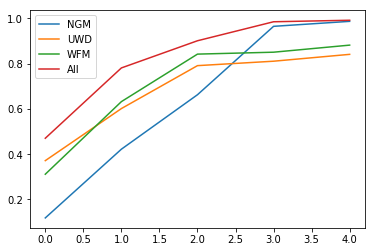

In [16]:
pd.DataFrame(accuracyRate).plot()

In [17]:
preprocessData=preprocess(mst)

In [18]:
predictData=[]
for i in range(0,5):
    predictDataOfLengthOfI={}
    for sty in inputs:
        predictDataOfLengthOfI[sty]=precisecal(predict(preprocessData,inputs[sty][i]),sty)
    predictData.append(predictDataOfLengthOfI)

In [19]:
predictDataByNgrams=[{sty:its[sty][0] for sty in its} for its in predictData]
predictDataByUswds=[{sty:its[sty][1] for sty in its} for its in predictData]
predictDataByWdfami=[{sty:its[sty][2] for sty in its} for its in predictData]

In [20]:
pd.DataFrame(predictDataByNgrams)

,bet,blk,brf,clk,cuf,jns
0,1.713834,4.124576,-2.502498,-5.581214,3.668973,-3.599469
1,-3.666835,5.000967,7.420226,5.218328,3.931076,-1.001674
2,1.658597,2.687283,4.042794,-7.024038,23.160785,0.764085
3,6.526310,12.647311,11.291967,9.921979,34.757284,15.307037
4,18.850020,20.348776,11.676842,16.597434,17.239594,22.476635


In [21]:
pd.DataFrame(predictDataByUswds)

,bet,blk,brf,clk,cuf,jns
0,-0.064872,-0.042962,4.696137,2.332633,0.039601,1.792004
1,-1.250001,2.575739,2.891125,2.187461,-0.228228,2.078593
2,4.386256,2.115989,4.352199,2.820151,1.295318,3.158008
3,6.287850,1.496406,3.259613,3.302898,4.317366,2.805619
4,6.298483,4.141865,5.052934,5.609973,10.474747,3.497735


In [22]:
pd.DataFrame(predictDataByWdfami)

,bet,blk,brf,clk,cuf,jns
0,-100.000000,-25.000000,300.000000,-100.000000,33.333333,9.090909
1,100.000000,-68.421053,33.333333,36.363636,63.636364,111.764706
2,37.931034,23.076923,105.839416,285.714286,117.021277,36.363636
3,237.500000,47.540984,127.285714,0.000000,105.839416,74.324324
4,187.934211,13.385827,109.768638,55.789474,313.691932,127.642857


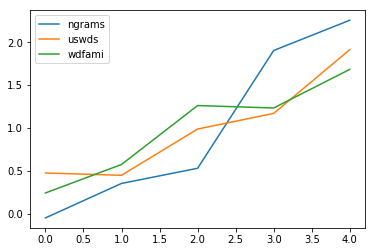

In [23]:
FigureData={'ngrams':[],'uswds':[],'wdfami':[]}
for i in range(0,5):
    FigureData['ngrams'].append(sum([predictDataByNgrams[sty][i] for sty in predictDataByNgrams]))
    FigureData['uswds'].append(sum([predictDataByUswds[sty][i] for sty in predictDataByUswds]))
    FigureData['wdfami'].append(sum([predictDataByWdfami[sty][i] for sty in predictDataByWdfami]))
for typ in FigureData:
    tpSum=sum(FigureData[typ])/5
    for i in range(0,5):
        FigureData[typ][i]/=tpSum
pd.DataFrame(FigureData).plot()

Figure 1

In this figure, the horizontal axis means the length of the predicted text. When it’s zero, length of the text is $e^3$. When it increased by one, the length of the text multiplied by $e$. And the bigger the vertical axis is, higher the prediction accuracy is.

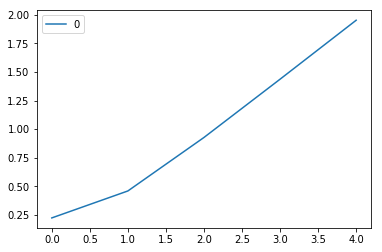

In [24]:
FigureData2=[0,0,0,0,0]
for sty in FigureData:
    for i in range(0,5):
        FigureData2[i]+=FigureData[sty][i]/3
pd.DataFrame(FigureData2).plot()

Figure 2

In this figure, the horizontal axis means the length of the predicted text. When it’s zero, length of the text is $e^3$. When it increased by one, the length of the text multiplied by $e$. And the bigger the vertical axis is, higher the prediction accuracy is.

We can tell from the result that, when the length of the text is below $e^5$, no indicator is able to show the source credible. When the length reaches $e^5$, the indicators uswds and wdfami begin to show the provenance of the sentence. When the length reaches $e^6$, the accuracy of the indicator ngrams increases greatly.<br></br>
Moreover, when the length of the input is below $e^5$, the indicators uswds and wdfami are most accurate. And when it’s over $e^6$, the indicator ngrams becomes the best one.<br></br>
To the longest inputs, predicted with all three indicators, it’s feasible to determine where the text resource with considerably high accuracy. 

In this paper, we discussed how the length affects the amount of the text feature contained in a text. We found that to the corpus _The Moonstone_, when the length of the text reached $e^5$, the predict accuracy rate is over 90%. This length could be a suitable minimum length of which the text is able to contain the representative characters of a narrator.

## Conclusions
<br></br>
### 1. There's a positive relationship between the length of the text and the amount of features it contains.
### 2. There's a certain number, when the length of the text is below that, with length increased, the growth in the amount of features it contains is much more significant. For _The Moonstone_, the number could be $e^5$.